<a href="https://colab.research.google.com/github/jgomezpe/sgoal/blob/main/sgoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SGoal: Stochastic Global Optimization Algorithms
This notebook shows some examples of using the sgoal python package available at the github of professor Jonatan Gomez https://github.com/jgomezpe/sgoal

## Preliminars
To run scripts in this notebook, you must install sgoal package from the github repository by running the following cell:

In [1]:
!pip install git+https://github.com/jgomezpe/sgoal/

  Cloning https://github.com/jgomezpe/sgoal/ to /tmp/pip-req-build-p85ueari
  Running command git clone --filter=blob:none --quiet https://github.com/jgomezpe/sgoal/ /tmp/pip-req-build-p85ueari
  Resolved https://github.com/jgomezpe/sgoal/ to commit db2f9a5345d778215bf8cdcd8496c15cead04bc6
  Preparing metadata (setup.py) ... done
  Created wheel for sgoal: filename=sgoal-1.0.0-py3-none-any.whl size=33422 sha256=3adef14fd67196a98397dc4c4146c2e5c47758b6d20c69798e9ba77d90700c69
  Stored in directory: /tmp/pip-ephem-wheel-cache-qhybob7h/wheels/09/42/f7/bd35d370e04658336a29af0773f97f7eb9820491a4920daf43
Successfully built sgoal


## Introduction
Suppose we want to <b>minimize</b> function:
\begin{equation*}
  \begin{array}{crll}
    \text{f: } & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & 10n-\sum_{i=1}^{n} x_i - 10\cos(2 \pi x_i))
      \\
  \end{array}
\end{equation*}
For  $x \in [-5.12,5.12]^{n}$ with $n=10$.

First, we write function $f$

In [2]:
import math

def f( x ):
  s = 0.0
  for i in range(len(x)):
    s += x[i]*x[i] - 10.0*math.cos(2.0*math.pi*x[i])
  return 10.0*len(x) + s

Then, we define the optimization problem:

In [3]:
from sgoal.real import RealSpace
from sgoal.core import PROBLEM
D = 10 # Dimension
space = RealSpace(-5.12, 5.12, D) # We define a D-dimensional hyperrectangle as Real vector space
EVALS = 1000*D # Maximum number of function evaluations
TRACE = True # We want to trace the algorithm
# Minimization problem (use 'max' for a maximization problem)
problem = PROBLEM('min', f, space, EVALS, TRACE) # We define the optimization problem

Finally, we use and run a SGoal. Here, we use Hill Climbing:

Best:  f(x)= 0.0020859096953813605 x= [-9.799622138392805e-05, 1.0754295883819154e-05, 0.00043015383051195344, -0.0012887816582236727, -4.516284522707026e-05, 0.0023557963583869246, -0.0008451682151046358, -0.001074548525874977, 0.0005953651841114904, 0.0009398121508199797]


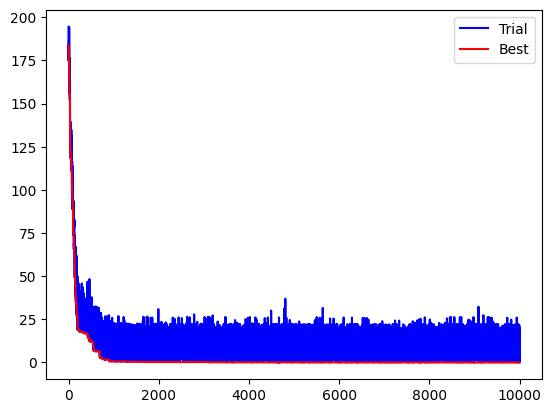

In [4]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

from sgoal.hc import RealHC # We use Hill Climbing for Real Spaces
from sgoal.core import run # runs a SGOAL
alg = RealHC(problem) # We use RealHC
results = run(alg) # We run RealHC

x = results['x'] # Best solution
fx = results['f'] # Best function value
print('Best:', ' f(x)=', fx, 'x=', x)
# Since we set trace to True we can get some additional information
y = alg['trace']['f'] # Value of the i-th function evaluation
z = alg['trace']['best'] # Value of the i-th best value
idx = [i for i in range(len(y))] # Evaluation
plt.plot(idx,y,label='Trial', color='blue')
plt.plot(idx,z, label='Best', color='red')
plt.legend()
plt.show()

## Optimizing Binary (Bit Array) Functions
SGoal provides a set of functions, classes, and algorithms for optimizing functions defined on bitstring (bit arrays).

Suppose we want to <b>maximize</b> the bit array function:
\begin{equation*}
  \begin{array}{crll}
    \text{g: } & \{0,1\}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & \sum_{i=1}^{n} x_i
      \\
  \end{array}
\end{equation*}
With $n=10$.

First, notice that $g=sum$ with $sum$ the sumation of the elements of a list (bit array). Then, we define the optimization problem and finally we use some bit array SGoal.

Best:  f(x)= 100 x= 1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111


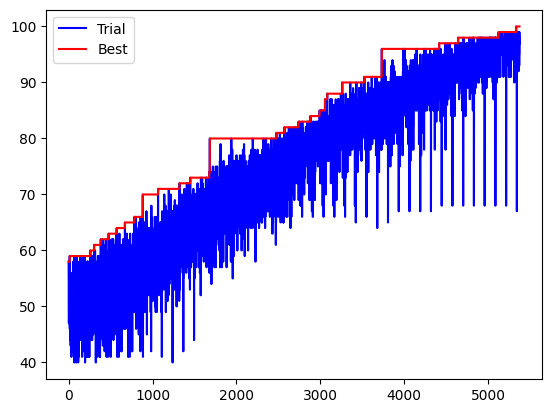

In [5]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

from sgoal.binary import Binary
from sgoal.hc import BinaryHC
from sgoal.chavela import BinaryCHAVELA
from sgoal.ga import BinaryGGA
from sgoal.ga import BinarySSGA
from sgoal.gabo import GABO
from sgoal.hc import RMHC
from sgoal.gsc1 import GS1
from sgoal.gsc1 import GSC1
from sgoal.core import PROBLEM
from sgoal.core import run

########## 1. DEFINE FUNCTION #########
# Since g = sum we do not need to define something
########## 2. DEFINE SPACE #########
D = 100 # Length of the bit array
EVALS = 100*D
TRACE = True
t = 'max' # Maximization problem (use 'min' for a minimization problem)
opt = 100 # Optimum value for the function (useful for comparing SGoals, if available)
space = Binary(D) # Solution space
PR = PROBLEM('max', sum, space, EVALS, TRACE)
PR['optimum'] = opt  # Optimum value. We set it for testing purposes
########## 3. RUN SGOAL #########
# Each one of the possible SGoals
ALG = [BinaryHC, RMHC, GS1, GSC1, GABO, BinaryGGA, BinarySSGA, BinaryCHAVELA]
K = 7 # SGoal to be tested (use a value between 0 and 7 to try other SGoals)
alg = ALG[K](PR)
results = run(alg)

x = results['x'] # Best solution
fx = results['f'] # Best function value
# Just for printing purposes
s = ''
for v in x:
  s += '1' if(v==1) else '0'
print('Best:', ' f(x)=', fx, 'x=', s)

# Since we set trace to True we can get some additional information
y = alg['trace']['f'] # Value of the i-th function evaluation
z = alg['trace']['best'] # Value of the i-th best value
idx = [i for i in range(len(y))] # Evaluation
plt.plot(idx,y,label='Trial', color='blue')
plt.plot(idx,z, label='Best', color='red')
plt.legend()
plt.show()

### Testbed
SGoal provides implementation of the classical bit array functions, see The "GABO: Gene Analysis Base Optimization" algorithm as proposed by J. Gomez and E. Leon, "Gabo: Gene Analysis Bitstring Optimization," 2022 IEEE Congress on Evolutionary Computation (CEC), Padua, Italy, 2022,pp. 1-8, doi: 10.1109/CEC55065.2022.9870237. for details:

$MaxOnes\left(x\right)={\displaystyle \sum_{i=1}^{D}} x_i$

$Gd3\left(x\right)={\displaystyle \sum_{k=1}^{m}}g3\left(x_{\left(S_k\right)}\right)$ with $S_k=\left\{3k+1, 3k+2, 3k+3\right\}$ and $g3(x)$ is the Goldberg's deceptive order-$3$ block function.

$Gbd4\left(x\right)={\displaystyle \sum_{k=1}^{m}}bd\left(x_{\left(S_k\right)}\right)$ with $S_k=\left\{4k+1,\ldots, 4k+4\right\}$ and $bd(x)$ is the Goldberg's bounded deceptive order-$4$ block function.

$Rr1\left(x\right)={\displaystyle \sum_{k=1}^{m}}Rrb_{8}\left(x_{\left(S_k\right)}\right)$ with $S_k=\left\{8k+1,\ldots, 8k+8\right\}$ and $Rrb_{8}(x)$ is the Royal Road $8$-bits block function:
 \begin{equation*}
    Rrb_K\left(x\right) =
    \begin{cases}
        K & \text{if } x=111\ldots111\\
        0 & \text{otherwise}
    \end{cases}
\end{equation*}

$Mixed\left(x\right)={\displaystyle \sum_{k=1}^{m}}Mxb\left(x_{\left(S_k\right)}\right)$ with $S_k=\left\{20k+1,\ldots, 20k+20\right\}$ and $Mxb\left(x\right) = MaxOnes\left(x_{1}\ldots x_{5}\right) + g3\left(x_{6}x_{7}x_{8}\right) + bd\left(x_{9} \ldots x_{12}\right) + Rrb_{8}\left(x_{13}\ldots x_{20}\right)$.

We can optimize any of these functions by using function $BitArrayProblem$ from <i>sgoal.binary</i> as follows:

Best:  f(x)= 280 x= 111111110000111111111111111111111111111111111111111111111111110111111111111111111111111111111111111111111111111111111111


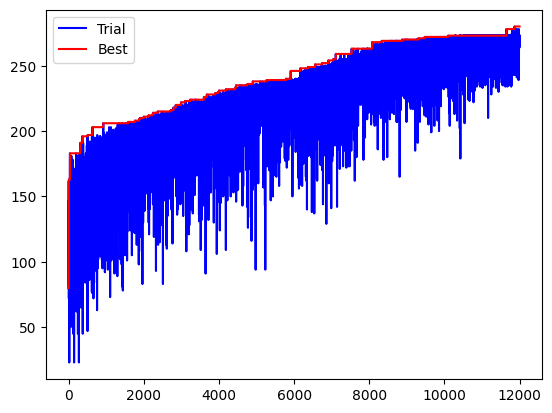

In [6]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

from sgoal.binary import Binary
from sgoal.binary import BinaryTestProblem
from sgoal.hc import BinaryHC
from sgoal.chavela import BinaryCHAVELA
from sgoal.ga import BinaryGGA
from sgoal.ga import BinarySSGA
from sgoal.gabo import GABO
from sgoal.hc import RMHC
from sgoal.gsc1 import GS1
from sgoal.gsc1 import GSC1
from sgoal.core import PROBLEM
from sgoal.core import run

D = 120 # Length of the bit array
name = ['MaxOnes','GD3','GBD4','RR1','RR2','Mixed']
EVALS = 100*D # Maximum number of objective function evaluations
F = 5 # Problem to solve
TRACE = True # We want to trace the algorithm
PR = BinaryTestProblem(name[F], D, EVALS, TRACE) # Problem to solve

########## 3. RUN SGOAL #########
# Each one of the possible SGoals
ALG = [BinaryHC, RMHC, GS1, GSC1, GABO, BinaryGGA, BinarySSGA, BinaryCHAVELA]
K = 7 # SGoal to be tested (use a value between 0 and 7 to try other SGoals)
alg = ALG[K](PR)
results = run(alg)
x = results['x'] # Best solution
fx = results['f'] # Best function value
# Just for printing purposes
s = ''
for v in x:
  s += '1' if(v==1) else '0'
print('Best:', ' f(x)=', fx, 'x=', s)
# Since we set trace to True we can get some additional information
y = alg['trace']['f'] # Value of the i-th function evaluation
z = alg['trace']['best'] # Value of the i-th best value
idx = [i for i in range(len(y))] # Evaluation
plt.plot(idx,y,label='Trial', color='blue')
plt.plot(idx,z, label='Best', color='red')
plt.legend()
plt.show()

## Optimizing $\mathbb{R}^n$ Functions
SGoal provides a set of functions, classes, and algorithms for optimizing functions defined on $\mathbb{R}^n$.

Suppose we want to <b>minimize</b> function:
\begin{equation*}
  \begin{array}{crll}
    \text{f: } & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & 10n-\sum_{i=1}^{n} x_i - 10\cos(2 \pi x_i))
      \\
  \end{array}
\end{equation*}
For  $x \in [-5.12,5.12]^{n}$ with $n=10$.

First, we write function $f$, then we define the space, and finally we define and use the SGoal algorithm:


Best:  f(x)= 0.14291013100960015 x= [0.007533556393057084, 0.008587834925656068, 0.008587834925656068, 0.008587834925656068, 0.008587834925656068, 0.008587834925656068, 0.008587834925656068, 0.008587834925656068, 0.008587834925656068, 0.008587834925656068]


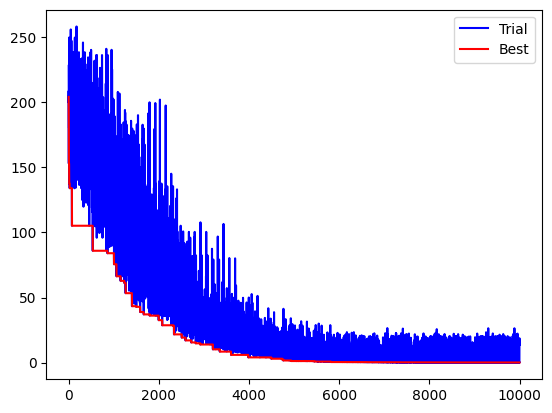

In [7]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

from sgoal.real import RealSpace
from sgoal.hc import RealHC
from sgoal.chavela import RealCHAVELA
from sgoal.ga import RealGGA
from sgoal.ga import RealSSGA
from sgoal.es import RealR1_5
from sgoal.real import RealSpace
from sgoal.core import PROBLEM

import math

########## 1. DEFINE FUNCTION #########
def f( x ):
  s = 0.0
  for i in range(len(x)):
    s += x[i]*x[i] - 10.0*math.cos(2.0*math.pi*x[i])
  return 10.0*len(x) + s

########## 2. DEFINE SPACE #########
D = 10 # Dimension
space = RealSpace(-5.12, 5.12, D) # We define a D-dimensional hyperrectangle as Real vector space
EVALS = 1000*D # Maximum number of function evaluations
TRACE = True # We want to trace the algorithm
# Minimization problem (use 'max' for a maximization problem)
problem = PROBLEM('min', f, space, EVALS, TRACE) # We define the optimization problem

########## 3. RUN SGOAL #########
# Each one of the possible SGoals
ALG = [RealHC, RealR1_5, RealGGA, RealSSGA, RealCHAVELA]
K = 4 # SGoal to be tested (use a value between 0 and 4 to try other SGoals)
alg = ALG[K](problem)
TRACE = True # We want to trace the algorithm
results = run(alg)
x = results['x'] # Best solution
fx = results['f'] # Best function value
print('Best:', ' f(x)=', fx, 'x=', x)
# Since we set trace to True we can get some additional information
y = alg['trace']['f'] # Value of the i-th function evaluation
z = alg['trace']['best'] # Value of the best function evaluation up to the i-th evaluation
idx = [i for i in range(len(y))] # Evaluation
plt.plot(idx,y,label='Trial', color='blue')
plt.plot(idx,z, label='Best', color='red')
plt.legend()
plt.show()

### Testbed
SGoal provides implementation of the following classical real functions  problems:

\begin{equation*}
  \begin{array}{crll}
    \text{Griewank:} & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & \sum_{i=1}^{n} \frac{x_i^2}{4000} - \prod_{i=1}^{n}\cos\left(\frac{x_i}{\sqrt{i}}\right)
      \\
  \end{array}
\end{equation*}
For  $x \in [-600,600]^{n}$.

\begin{equation*}
  \begin{array}{crll}
    \text{Rastrigin:} & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & 10n-\sum_{i=1}^{n} x_i - 10cos(2 \pi x_i))
      \\
  \end{array}
\end{equation*}
For  $x \in [-5.12,5.12]^{n}$.

\begin{equation*}
  \begin{array}{crll}
    \text{Schwefel:} & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & 418.9829n-\sum_{i=1}^{n} x_i \sin(\sqrt{|x_i|})
      \\
  \end{array}
\end{equation*}
For  $x \in [-500,500]^{n}$.

\begin{equation*}
  \begin{array}{crll}
    \text{Rosenbrock:} & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & \sum_{i=1}^{n-1} 100(x_{i+1} - x_i^2)^2 +(x_i-1)^2
      \\
  \end{array}
\end{equation*}
For  $x \in [-2.048,2.048]^{n}$.

\begin{equation*}
  \begin{array}{crll}
    \text{Sphere:} & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & \sum_{i=1}^{n} x_i^2
      \\
  \end{array}
\end{equation*}
For  $x \in [-5.12,5.12]^{n}$.

We can optimize any of these functions by using function $RealProblem$ from <i>sgoal.real</i> as follows:

Best:  f(x)= 0.0010241988581922296 x= [-0.008165260087124954, -0.010552582110622488, -0.010552582110622488, -0.010552582110622488, -0.010552582110622488, -0.010552582110622488, -0.010552582110622488, -0.010552582110622488, -0.010552582110622488, -0.008165260087124954]


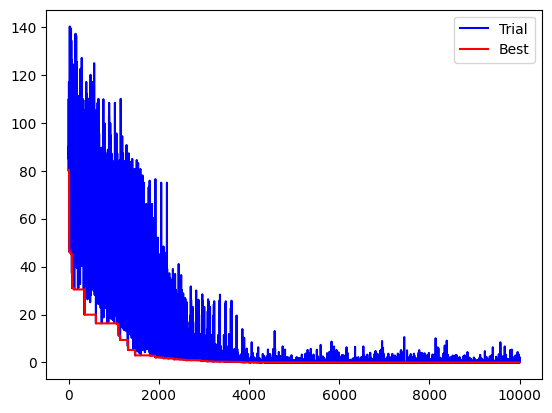

In [8]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

from sgoal.real import RealSpace
from sgoal.hc import RealHC
from sgoal.chavela import RealCHAVELA
from sgoal.ga import RealGGA
from sgoal.ga import RealSSGA
from sgoal.es import RealR1_5
from sgoal.real import RealSpace
from sgoal.real import RealTestProblem

D = 10
EVALS = 10000
TRACE = True
TF = 0 # 0: Testing Rastrigin
name = ['Rastrigin', 'Schwefel', 'Rosenbrock', 'Griewank', 'Sphere']
problem = RealTestProblem(name[TF], D, EVALS, TRACE)

########## 3. RUN SGOAL #########
# Each one of the possible SGoals
ALG = [RealHC, RealR1_5, RealGGA, RealSSGA, RealCHAVELA]
K = 4 # SGoal to be tested (use a value between 0 and 4 to try other SGoals)
alg = ALG[K](problem)
results = run(alg)
x = results['x'] # Best solution
fx = results['f'] # Best function value
print('Best:', ' f(x)=', fx, 'x=', x)
# Since we set trace to True we can get some additional information
y = alg['trace']['f'] # Value of the i-th function evaluation
z = alg['trace']['best'] # Value of the best function evaluation up to the i-th evaluation
idx = [i for i in range(len(y))] # Evaluation
plt.plot(idx,y,label='Trial', color='blue')
plt.plot(idx,z, label='Best', color='red')
plt.legend()
plt.show()

##Experiments
SGoal provides a function for running several times an algorithm on the same function. In the following example we run $R$ times some SGoals on testbed bit array functions. Followig script can be used to obtain similar result to those reported by J. Gomez and E. Leon in "GABO: Gene Analysis Base Optimization" 2022 IEEE Congress on Evolutionary Computation (CEC), Padua, Italy, 2022, pp. 1-8, doi: 10.1109/CEC55065.2022.9870237 (https://dl.acm.org/doi/10.1109/CEC55065.2022.9870237).

================= 120 =================
*************** Mixed ***************
SGOAL   SR      MAX       EVALS
GABO 0.2 271.33+/-7.67 7845.53+/-2041.37
RMHC 0.0 263.33+/-6.48 7465.0+/-2211.97
GS1 0.0 209.33+/-2.7 12001.0+/-0.0
GSC1 0.0 209.97+/-3.31 11570.73+/-1470.23
GGA 0.0 254.27+/-9.76 8285.63+/-2381.14
SSGA 0.0 260.07+/-8.97 8482.07+/-2463.96
CHAVELA 0.1 268.67+/-11.56 11140.33+/-809.77


<Axes: >

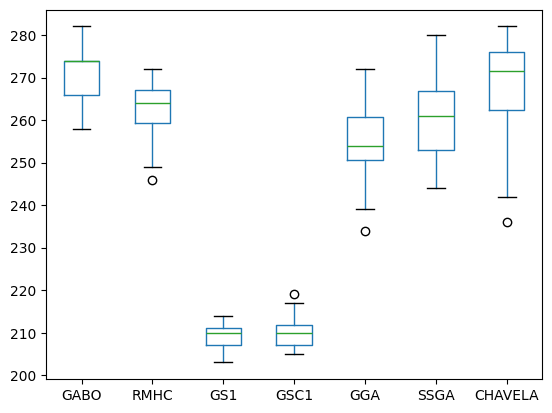

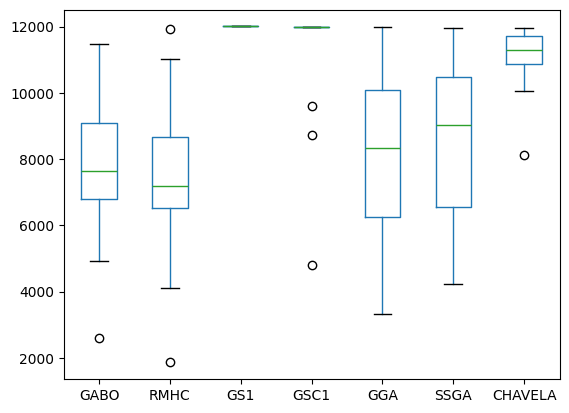

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sgoal.binary import Binary
from sgoal.binary import BinaryTestProblem
from sgoal.hc import BinaryHC
from sgoal.chavela import BinaryCHAVELA
from sgoal.ga import BinaryGGA
from sgoal.ga import BinarySSGA
from sgoal.gabo import GABO
from sgoal.hc import RMHC
from sgoal.gsc1 import GS1
from sgoal.gsc1 import GSC1
from sgoal.core import PROBLEM
from sgoal.core import run
from sgoal.core import experiment

# We format numbers to two decimal positions for presentation purposes
def round(x): return (int(100*x+0.5))/100

# We compute statistical information (average and standard deviation)
def stats(a):
  n = len(a)
  avg = sum(a)/n
  std = 0
  for y in a:
    std += (y-avg)**2
  std = (std/(n-1))**0.5
  return avg, std

# Paper reported values
def report(sgoal, fx, evals, sr):
  avg, std = stats(fx)
  avg, std = round(avg), round(std)
  avg_evals, std_evals = stats(evals)
  avg_evals, std_evals = round(avg_evals), round(std_evals)
  print(sgoal, ' ', round(sr), ' ', avg, '+/-', std, ' ', avg_evals, '+/-', std_evals, sep='')
  return sr, avg, std, avg_evals, std_evals

#Main program
# Search algorithm
sgoal = [GABO, RMHC, GS1, GSC1, BinaryGGA, BinarySSGA, BinaryCHAVELA]
sgoal_name = ['GABO', 'RMHC', 'GS1', 'GSC1', 'GGA', 'SSGA', 'CHAVELA']
name = ['MaxOnes','GD3','GBD4','RR1','Mixed']
F = 4 # Testing the Mixed function. Change the number accordingly
R = 30 # Number of experiments
D = 120 # Problem dimension (BitArray Length)
EVALS = 100*D # Maximum number of fitness evaluations

df = pd.DataFrame()
dfiter = pd.DataFrame()
print('=================', D, '=================')
print('***************', name[F], '***************')
print('SGOAL   SR      MAX       EVALS')
for i in range(len(sgoal)):
  problem = lambda : BinaryTestProblem(name[F], D, EVALS) # We will no trace additional information
  fx, evals, SR = experiment(sgoal[i], problem, R)
  report(sgoal_name[i], fx, evals, SR)
  df[sgoal_name[i]] = fx
  dfiter[sgoal_name[i]] = evals

myFig = plt.figure();
df.boxplot(grid=False)
myFig = plt.figure();
dfiter.boxplot(grid=False)